## Capstone Project 1: Data Storytelling

Data Source:  http://jmcauley.ucsd.edu/data/amazon/

For this project I will use three product categories datasets: baby products, grocery and gourment foods, and cellephones dataset.

The objective of my Capstone project 1 (sentiment Analysis of Amazon product reviews) is to determine polarity of a review text i.e. whether a given review is positive (rating: 4 or 5) or negative(rating 1 or 2) based on ratings and reviews, which can help businesses make decision based on customer reviews.

In this exploration of Amazon product reviews dataset, I will analyse the features of review text with respect to ratings.
These are the questions I will look in the data:

- How the distribution of data based on review categories (or star ratings) and distribution of review length looks like? 
- How the distribution of number of ratings in different product categories looks like?
- How the reviews change across high and low star ratings based on review length and percentage of UPPERCASE words per review   
  for different product categories?
- what are the most frequently used words for high and low ratings and it's vizualization with word clouds? 



In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
import seaborn as sns

import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud


#### JSON files loaded to pandas DatFrame for the three product categories

In [3]:
# Read json file into a pandas Dataframe

baby_products = pd.read_json('Baby_5.json', lines=True)

# Take a look at the first 5 rows
baby_products.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1HK2FQW6KXQB2,097293751X,"Amanda Johnsen ""Amanda E. Johnsen""","[0, 0]",Perfect for new parents. We were able to keep ...,5,Awesine,1373932800,"07 16, 2013"
1,A19K65VY14D13R,097293751X,angela,"[0, 0]",This book is such a life saver. It has been s...,5,Should be required for all new parents!,1372464000,"06 29, 2013"
2,A2LL1TGG90977E,097293751X,Carter,"[0, 0]",Helps me know exactly how my babies day has go...,5,Grandmother watching baby,1395187200,"03 19, 2014"
3,A5G19RYX8599E,097293751X,cfpurplerose,"[0, 0]",I bought this a few times for my older son and...,5,repeat buyer,1376697600,"08 17, 2013"
4,A2496A4EWMLQ7,097293751X,C. Jeter,"[0, 0]",I wanted an alternative to printing out daily ...,4,Great,1396310400,"04 1, 2014"


In [4]:
grocery_foods = pd.read_json('Grocery_and_Gourmet_Food_5.json', lines=True)
grocery_foods.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1VEELTKS8NLZB,616719923X,Amazon Customer,"[0, 0]",Just another flavor of Kit Kat but the taste i...,4,Good Taste,1370044800,"06 1, 2013"
1,A14R9XMZVJ6INB,616719923X,amf0001,"[0, 1]",I bought this on impulse and it comes from Jap...,3,"3.5 stars, sadly not as wonderful as I had hoped",1400457600,"05 19, 2014"
2,A27IQHDZFQFNGG,616719923X,Caitlin,"[3, 4]",Really good. Great gift for any fan of green t...,4,Yum!,1381190400,"10 8, 2013"
3,A31QY5TASILE89,616719923X,DebraDownSth,"[0, 0]","I had never had it before, was curious to see ...",5,Unexpected flavor meld,1369008000,"05 20, 2013"
4,A2LWK003FFMCI5,616719923X,Diana X.,"[1, 2]",I've been looking forward to trying these afte...,4,"Not a very strong tea flavor, but still yummy ...",1369526400,"05 26, 2013"


In [5]:
cell_phones = pd.read_json('Cell_Phones_and_Accessories_5.json', lines=True)
cell_phones.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [6]:
# column names
baby_products.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [7]:
# Rename the columns 

baby_products = baby_products.rename(columns = {'overall': 'rating', 'summary': 'review_summary'})


grocery_foods = grocery_foods.rename(columns = {'overall': 'rating', 'summary': 'review_summary'})

cell_phones = cell_phones.rename(columns = {'overall': 'rating', 'summary': 'review_summary'})
cell_phones.head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,rating,review_summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"


In [8]:
# Find out total no of rows and columns

baby_products.shape

(160792, 9)

In [9]:
grocery_foods.shape

(151254, 9)

In [10]:
cell_phones.shape

(194439, 9)

#### Find if there is any missing value in datasets and count them.

In [11]:
# Any misssing values ?
baby_products.isnull().values.any()

True

In [12]:
grocery_foods.isnull().values.any()

True

In [13]:
cell_phones.isnull().values.any()

True

In [14]:
# Count missing values
baby_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160792 entries, 0 to 160791
Data columns (total 9 columns):
reviewerID        160792 non-null object
asin              160792 non-null object
reviewerName      159427 non-null object
helpful           160792 non-null object
reviewText        160792 non-null object
rating            160792 non-null int64
review_summary    160792 non-null object
unixReviewTime    160792 non-null int64
reviewTime        160792 non-null object
dtypes: int64(2), object(7)
memory usage: 11.0+ MB


In [15]:
grocery_foods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151254 entries, 0 to 151253
Data columns (total 9 columns):
reviewerID        151254 non-null object
asin              151254 non-null object
reviewerName      149761 non-null object
helpful           151254 non-null object
reviewText        151254 non-null object
rating            151254 non-null int64
review_summary    151254 non-null object
unixReviewTime    151254 non-null int64
reviewTime        151254 non-null object
dtypes: int64(2), object(7)
memory usage: 10.4+ MB


In [16]:
cell_phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194439 entries, 0 to 194438
Data columns (total 9 columns):
reviewerID        194439 non-null object
asin              194439 non-null object
reviewerName      190920 non-null object
helpful           194439 non-null object
reviewText        194439 non-null object
rating            194439 non-null int64
review_summary    194439 non-null object
unixReviewTime    194439 non-null int64
reviewTime        194439 non-null object
dtypes: int64(2), object(7)
memory usage: 13.4+ MB


In [17]:
# Total number of missing values
print(baby_products.isnull().sum().sum())
print(grocery_foods.isnull().sum().sum())
print(cell_phones.isnull().sum().sum())

1365
1493
3519


There are missing values only in the reviewer's name attribute. For our analysis I will be using only the reviewText and ratings columns. So I will not remove the missing value rows because it does not change the analysis in either ways.

In [11]:
# Keep the review columns and rating (drop the rest of the columns)

baby_products = baby_products.drop(columns=['reviewerID', 'asin', 'reviewerName', 'helpful', 'unixReviewTime', 'reviewTime'])
grocery_foods = grocery_foods.drop(columns=['reviewerID', 'asin', 'reviewerName', 'helpful', 'unixReviewTime', 'reviewTime'])
cell_phones = cell_phones.drop(columns=['reviewerID', 'asin', 'reviewerName', 'helpful', 'unixReviewTime', 'reviewTime'])
cell_phones.head(2)

,reviewText,rating,review_summary
0,They look good and stick good! I just don't li...,4,Looks Good
1,These stickers work like the review says they ...,5,Really great product.


#### Check for duplicate review text rows and drop them

In [12]:
# Check for duplicate reviewText 

duplicate_rev_baby = baby_products.duplicated(subset='reviewText', keep='first').sum()
duplicate_rev_baby

69

In [13]:
duplicate_rev_food = grocery_foods.duplicated(subset='reviewText', keep='first').sum()
duplicate_rev_food

55

In [14]:
duplicate_rev_phone = cell_phones.duplicated(subset='reviewText', keep='first').sum()
duplicate_rev_phone

253

In [15]:
# Drop duplicate reviewText
baby_products = baby_products.drop_duplicates(subset = 'reviewText', keep='first')
len(baby_products)

160723

In [16]:
grocery_foods = grocery_foods.drop_duplicates(subset = 'reviewText', keep='first')
len(grocery_foods)

151199

In [17]:
cell_phones = cell_phones.drop_duplicates(subset = 'reviewText', keep='first')
len(cell_phones)

194186

#### I will remove short review text of less than 3 words. Because sentiment analysis are less effective when review texts are short

In [18]:
# Remove short reviewText: less than < 3 words

def remove_short_review(text):
    length = len(text.split())
    if length >= 3:
        return True
    else:
        return False
    
baby_products = baby_products[baby_products['reviewText'].apply(lambda x:remove_short_review(x))]
len(baby_products)

160662

In [19]:
grocery_foods = grocery_foods[grocery_foods['reviewText'].apply(lambda x: remove_short_review(x))]
len(grocery_foods)

151054

In [20]:
cell_phones = cell_phones[cell_phones['reviewText'].apply(lambda x: remove_short_review(x))]
len(cell_phones)

193876

#### Remove non_English reviews

In [ ]:
from langdetect import detect

def mydetect(txt):
    try:
        return detect(txt)
    except:
        return None

baby_products['clean_review'] = baby_products['reviewText'].apply(mydetect)
baby_products.head(2)

In [44]:
for e in baby_products['reviewText']:
    try:
        if detect(e) == 'en':
            print(e)
    except LangDetectException:
        pass

Perfect for new parents. We were able to keep track of baby's feeding, sleep and diaper change schedule for the first two and a half months of her life. Made life easier when the doctor would ask questions about habits because we had it all right there!
This book is such a life saver.  It has been so helpful to be able to go back to track trends, answer pediatrician questions, or communicate with each other when you are up at different times of the night with a newborn.  I think it is one of those things that everyone should be required to have before they leave the hospital.  We went through all the pages of the newborn version, then moved to the infant version, and will finish up the second infant book (third total) right as our baby turns 1.  See other things that are must haves for baby at [...]
Helps me know exactly how my babies day has gone with my mother in law watching him while I go to work.  It also has a section for her to write notes and let me know anything she may need. 

The layout of the hours are a little tricky but it does the job.  The print on each page is a light grey, so trying to journal diapers, bottles, meds in the middle of the night is a challenge.  It is detailed in slots to make notes and I would prefer a journal that does not take space for breast-feeding if one chooses formula only.  I could use the space to make more notes and comment on something cute that day.
This is the best way to keep track of when your baby eats, sleeps, poops, gets a bath, etc. It's also a great way to keep track of which side baby nursed on. I took this to all infant doc appt. And it's a great gift!
Please, please take this to the hospital with you- you'll thank me later. We did, but it stayed in the suitcase for 2 days because we were SO &#34;out of it&#34; dealing with my c-section,, etc. We  had been keeping notes -on loose sheets of paper- of baby's feedings and diaper output (so crucial those first few days). We were also using an iPhone app that proved m

My son loves to chew on things and is still awaiting his first tooth. His older brother had the strawberry vibrating teether but I prefer this one because it doesn't look so feminine and it is also less expensive.
This teether is ridiculous. It's huge, it's hard to clamp down on, and my daughter had no idea what was going on when it started vibrating in her mouth.It's just too big, awkward, and hard to push down on. Not worth the money, in my opinion.
My son loves this.  It took him a few tries to get the hang of it but its real simple for him to use.  When he bites it and it vibrates, he starts laughing and the tears disappear.
While I sort of wish I could change the batteries in these things instead of buying a new one when it dies (my little guy HAS to have it vibrate), this was a life saver for me when both my kids (one 4 years and one 6 months) were/are teething. And for my youngest, it's just about the only thing that works.
This was a favorite as soon as my son figured out that 

Baby loves this teether. Nice to have something different from all of the other teethers out there. The nice thing is that when she no longer wants it to vibrate, she still has fun the with handle the spins. Great product and it has lasted despite being thrown all around.
My friend recommended this teether because her daughter loves it.  However, my daughter loves throwing it on the floor.  Hopefully, it will work better for you.
We have another vibrating teether that is very similar to this one, there are some differences though.This one is much softer on the outside which could be nice on tender gums.This one has 3 points that she can use to pin point the problem area.Each point has a different texture (bumps, ridges) so there is some varianceThis one seems like it is easier to activateI will say that I don't know if she favors one for the other.  It seems like she uses them both about equally.She also likes to play with it by making it vibrate on her hands, feet, cheeks etc.  We hav

I really wanted to love this sling.  I had seen several mothers use these before, and the nurse in our childbirth class raved about it.  I was so excited when I received it as a gift.I started using this with my son when he was just a week old. I put him in the cradle position, but I was so afraid he was going to sufficate on the fabric around him, I had to keep my hand in the sling next to his face.As he got older, it did get easier to use.  It was good to use while in the grocery store.  However, it pulled hard on my shoulder.Now, he's 7 months old, and he's crawling and pulling himself up, and he doesn't like to be restrained at all.  I've tried the kangaroo position, but I'm so scared he's going to fall out the bottom because he is quite a wiggle worm.  The last time I used this, the shoulder strap got so close to my neck that it started to interfere with my circulation.I'm glad I had this for the grocery store, but I think with my next child, I'm going to have to rethink what kind

This product isn't that bad... however it is not smell proof.  I love the fact that it will take any type of trash bag, but if you do not empty the pail out daily the smell leaks out into your baby's room and it does not smell pleasant.
It makes so much more sense to just use regular kitchen trash bags, more cost effective. It is easier to use. There were no smell problems AT ALL until about 18months - 2years old, well "hello - diet change produces stinkier diapers". Makes sense. . but still use it for wet diapers. Hopefully potty training will happen soon! :)The only down-side, is that babysitters are so "diaper genieized" they pop off the side handle trying to do it the wrong way. But the good side is, it is easy to pop back on.The diaper champ is really durable. I highly recommend it to anyone!
I truly believe this is the best diaper pail on the market...  It's simple to use, can take any garbage bag, and does a fantastic job of containing odors.  BUT, my complaint is -- why couldn'

I have used this for 11 months and I love it. What we did was after the baby started having odor in his #2s we bought some of those diaper bags from dollar tree (100 for $1) and put the dirty diapers in those little bags. So easy! Never an odor problem. And I use regular kitchen garbage bags in it, so no special bags to buy.I did research when I was registering before the baby and looked at all of the other diaper pails and this one was the one that came out ahead. I am glad I researched it because I am very happy with it!
I love my Diaper Champ. My son is 3 months old and we have had a great experience with it. It's simple to use and is cost efficient. The biggest plus to this diaper pail is that you can use any plastic bag you want. As far as some people saying it smells, I haven't had a problem. Once a week I soak it with Lysol and water to keep germs away. I highly recommed this product if you want a clean, simple, and convenient diaper pail!
the diaper champ does it's job: it coll

Let's face it.  This is a specially designed garbage can to hold human feces.  One cannot expect that it will be odor free.  Mine certainly isn't.  It is my fault, though.  If I emptied the bag more often, there would not be a stench.  But alas, I am lazy.  So when I do change the bag, I also spray some lysol.  Works for me.  I like it that you just have to flip the handle for the diaper to go bye bye.When I first got the product, I really hurt my finger trying to open the thing.  But that was my own fault.  I did not have it on the floor.  When opening the lid, step on the stabilizer ring at the bottom of the unit and it opens with ease.I too love that you do not have to buy special bags for this.  What a pain to have to remember to buy and then spend five bucks a pop on Genie bags.  Thanks, but no.All in all, I really like my Diaper Champ.  It's also taller than the genie which is good for me, I don't have to bend over so much to flip the lid.
This is a fine product and I am happy wi

This is another great baby purchase.  When I brought it home, my husband laughed at me and said that it was just a "gadgety" baby thing that we didn't need.  He changed his mind though after we put it into use and saw how well it worked!First, it really keeps the odor in.  I'm pretty sensitive to smells, but this one does a good job of containing odors.  Just to play it safe though, I make sure to empty it every day and a half to two days or so (you could probaby go longer), and I spray it with Lysol as well.  Keeping with that practice, I haven't had a problem with bad odors.Secondly, its economical--its not expensive to buy, and its not expensive to maintain.  Its nice to be able to use regular garbage bags and not having to buy expensive diaper disposal system specific bags.No bad odors and not expensive to buy or maintain---I definitely recommend this product!
You can't put poopie diapers in this pail, it doesn't hold the smell back at all.  I use it for the wet diapers and it's fi

I read a review below that can explain exactly what we experienced. We've had it for 16 months and it has worked wonderful for us. No smells, change it out once a week, easy to clean. Then a diaper snagged this foam material in the head part, so I pulled the rest of the foam out. Big mistake!!! Now it can no loner retain the stinkiness and we're looking for a replacement. Be careful of overloading and never take out that foam piece that is cushioned between pieces. I have figured out that it is key to keeping the stink out.
I got the diaper champ because of the great reviews as well as the fact that you can use regular garbage bags.  It works great.  I can't smell anything (and believe me, this is quite something with my baby).  I ended up buying one for upstairs and one for downstairs because it works so well and because I change him so often downstairs.  It's much better than putting diapers in a downstairs trashcan.  The reviews were definitely right.
If you really want to save mone

This is one of the items that I absolutely love, something I'd rather not live without. The only time I've ever noticed a smell is when you leave the poopy diapers in the pail too long.Love it!
I LOVE THIS PRODUCT!  MY HUSBAND AND I CHOSE TO USE CLOTH DIAPERS ON OUR SON AND THIS WORKS GREAT FOR HOLDING THEM UNTIL THEY GET WASHED.  WE NEVER NOTICE A SMELL COMING FROM IT.  WE ALSO LOVE THAT IT USES REGULAR TRASH BAGS RATHER THAN NEEDING SPECIAL BAGS.  IT HAS BEEN A REALLY GREAT PRODUCT FOR US AND WE HIGHLY RECOMMEND IT TO ANYONE WHO IS CLOTH DIAPERING THEIR BABY.
We registered for the diaper champ mostly based on the reviews and the fact that no special bags were needed. I am very impressed with how easy it is to change the bag and I have not had any problems with smells. We use the odor guard trash bags but I doubt it has much effect (it doesn't in the kitchen anyway). The diaper champ is super easy to use and very cost effective. Would definitely recommend
THis is the only one I have e

We have both a Diaper Champ and a Diaper Genie....and we definitely prefer our Champ!  Not only is it much more cost effective (you can use regular trash bags rather than Refills at $5 a pop), it is easier to use and clean, and has a larger capacity.  Only problem...it can be frustrating and messy when you put that last diaper in before realizing the unit is full.  The pluger gets stuck & you have to manually extract the mess.
This is the most convenient on the market considering you don't need specific refills!!! I strongly recommend it.
Let me just say this... After being a nanny for almost 10 years I have tried them all. This one is really great. I actually took a friends word on it and went with this Champ when registering and I am glad I did. I just knew all along what products I would not use, but was undecided on the actual one I wanted. Well the Champ has survived it's first year with our son and it is great!! We just bought another for baby boy number two coming next month. Th

When my hand-me-down Diaper Genie broke, I bought a Diaper Champ. I figured I'd save some money not having to buy the Diaper Genie refills. While I was happy about being able to use regular trash bags, that was all that really impressed me with the Diaper Champ.The odor protection of the Diaper Champ really leaves something to be desired. My son's room smelled very badly, even when I changed the pail every day.Changing the Diaper Champ really isn't a pleasant experience. Not only does the odor of multiple nasty diapers spew forth (nothing is sealed) when you open the lid to change the trash bag, but the trash bag is somewhat difficult to position correctly.Well, I'm back to using a Diaper Genie, and my son's room smells just fine. Save your money and buy something other than the Diaper Champ the first time around.
I decided to get this diaper disposal system instead of all of the others for one simple fact: NO REFILLS NEEDED! You use any type of bag you want, and I love this idea. The 

I really wish that I had this when my son was a newborn and all those midnight crib cya gongs could have been avoided. This is a really great and easy to use product. It is definitely one of the first things that I recommend to parents and I'm glad that we will have it around for our second child. Make sure tha you buy a backup one or teo for those late night changings. This came in very handy when our 18 month old went through potty training and just for any other leakages or accidents that kids sometimes have.My only complaint was that when we washed these in the wash, some of the snaps would break off. also, on a side note, as cheap as these are from Amazon, I have also been able to find the same brand at TJMaxx and Marshalls for half the price.
When my son was a newborn, I was able to fold it in two and placed a blanket on top to make it a little more comfortable because it is kind of scratchy.  Now at four months it is at is full length and I still put a blanket on top of it.  Whe

We registered for the Ultimate Crib Sheet because a cousin and a few friends raved about it - they said to get two so that one could be on the crib and one could be in the wash.  I received it at my baby shower, but we have found only limited value in this crib sheet for our 11 month old daughter.  I am glad we only have one of these!The Ultimate Crib Sheet that we have is the style with elastic straps on each corner, one fully-removable elastic strap in the center of the short end, and two straps on each long end.  We have a Pali Wendy 4-in-1 Convertible Crib and the corner posts are quite thick, to the point where the elastic straps are not long enough to easily go around the corners.  Instead on one end of the crib we have to resort to wrapping the straps around the crib slats adjacent to the corner posts and that means there's slightly less than full coverage of the sheet underneath.  Since our daughter is a "perimeter" sleeper who likes to be up against the edges of her crib, that

I ordered two pack. One of them was an open item but the sheet looks fine and doesn't seem like have been used. I'm okay with that because i bought them for less than $4!
My son spit up in his sleep for the first 6 months, so this product was wonderful.  However, by the time that he was 6 months old, all of my ultimate crib sheets had developed holes and cracks in the plastic backs.  The product was such a life saver that I will purchase new ones (maybe a different brand) for future children, but I really expected more than 6 months of use out of these.
I love this item.  It is much easier for those middle of the night diaper mishaps, to just go in and unsnap the top sheet and put baby back to bed.  I have washed and dried the sheet and had no problems what-so-ever.
This is supposed to save time instead of changing out the sheet, but I found it took just as long to change this as it does to change the actual sheet.  You have to reach all around the crib to do (or undo) all the snaps, w

Seems to fit just fine except that the corner snaps could be longer.  We have a Sorelle Rosa crib with hidden hardware so the snaps must go around the outside of two bars for each corner.  The straps are just not long enough to effectively go around all 4 corners.  No big deal though as we just do two corners and then go around the first set of bars on the far side.  So the sheet is offset by a couple inches but doesn't appear to have enough slack to become a safety issue.  If our baby does start to try to get under the sheet it doesn't seem like a difficult task to just add our our strap extensions.  We'll probably be buying a few more to allow for more time between laundry runs.
I bought these because a good friend recommended them.  They are awesome especially when kids have runny noses etc.  It saves me from having to change the crib sheet.  The only downside is you can't see the pretty design on the crib sheet but for me that is really no big deal.
This pad has worked well for my 

Initially my husband and I decided not to purchase a diaper pail because we wondered what was the point, diapers stink and no matter how much money one spends on a diaper pail it's going to emit odors and smell bad. Then, when we were changing diapers ten times a day we decided it would probably be easier to have one, especially for the middle of the night diaper changes. Several of my friends disapproved of the Diaper Genie and recommended we purchase an inexpensive diaper pail that uses regular garbage bags. We took that advice and selected the Safety 1st diaper pail and we are pleased with the product. Odor-Less - No. We empty it as needed, usually once a week, and realize it's a diaper pail - just as our garbage pail in the Kitchen needs to be emptied daily someday so will the diaper pail. I place an aroma jell in the little basket which helps with the odor.
Purchased this unit to hold adult size large briefs and have been pleasantly surprised.  Holds approximately 8 soiled briefs 

NameError: name 'LangDetectException' is not defined

In [21]:
# Remove non-English using NLTK
import nltk 
nltk.download('words')
words = set(nltk.corpus.words.words())

def remove_non_en(text):
    text = " ".join(w.lower() for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    return text
baby_products['clean_review_baby'] = baby_products['reviewText'].apply(lambda x: remove_non_en(x))
baby_products.head(5)

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\prava\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


,reviewText,rating,review_summary,clean_review_baby
0,Perfect for new parents. We were able to keep ...,5,Awesine,perfect for new . we were able to keep track o...
1,This book is such a life saver. It has been s...,5,Should be required for all new parents!,this book is such a life saver . it been so he...
2,Helps me know exactly how my babies day has go...,5,Grandmother watching baby,me know exactly how my day gone with my mother...
3,I bought this a few times for my older son and...,5,repeat buyer,i bought this a few times for my older son and...
4,I wanted an alternative to printing out daily ...,4,Great,i an alternative to printing out daily log for...


In [22]:
grocery_foods['clean_review_food'] = grocery_foods['reviewText'].apply(lambda x: remove_non_en(x))
grocery_foods.head(5)

,reviewText,rating,review_summary,clean_review_food
0,Just another flavor of Kit Kat but the taste i...,4,Good Taste,just another flavor of kit kat but the taste i...
1,I bought this on impulse and it comes from Jap...,3,"3.5 stars, sadly not as wonderful as I had hoped",i bought this on impulse and it comes from jap...
2,Really good. Great gift for any fan of green t...,4,Yum!,really good . great gift for any fan of green ...
3,"I had never had it before, was curious to see ...",5,Unexpected flavor meld,"i had never had it before , was curious to see..."
4,I've been looking forward to trying these afte...,4,"Not a very strong tea flavor, but still yummy ...",i ' been looking forward to trying these after...


In [141]:
cell_phones['clean_review_phones'] = cell_phones['reviewText'].apply(lambda x: remove_non_en(x))
cell_phones.head(5)

,reviewText,rating,review_summary,clean_review_phones
0,They look good and stick good! I just don't li...,4,Looks Good,they look good and stick good ! i just don ' t...
1,These stickers work like the review says they ...,5,Really great product.,these stickers work like the review they do . ...
2,These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,these are awesome and make my phone look so st...
3,Item arrived in great time and was in perfect ...,4,Cute!,item in great time and was in perfect conditio...
4,"awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,"awesome ! stays on , and great . can be used o..."


### Distributions

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Ratings')]

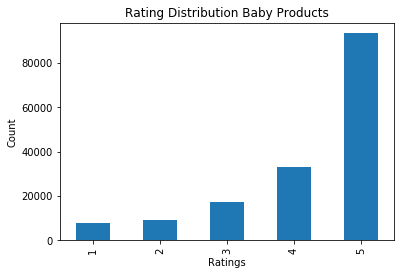

In [33]:
# Rating Distributions

baby_products['rating'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution Baby Products').set(xlabel='Ratings', ylabel="Count")


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Ratings')]

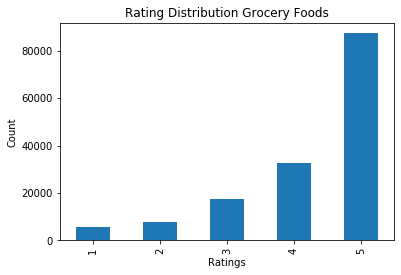

In [39]:
grocery_foods['rating'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution Grocery Foods').set(xlabel='Ratings', ylabel="Count")

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Ratings')]

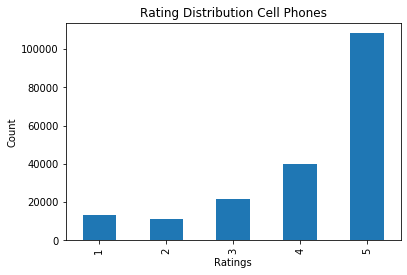

In [41]:
cell_phones['rating'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution Cell Phones').set(xlabel='Ratings', ylabel="Count")

We notice that most of the reviews are five stars in all the three product categories

Text(0.5, 0, 'review_length')

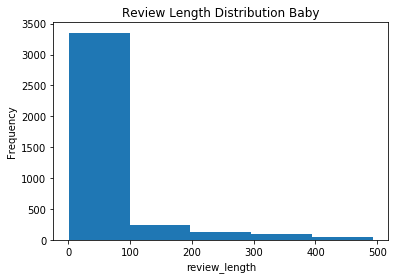

In [74]:
# Review length Distribution

review_length = baby_products['reviewText'].apply(len)
review_length.value_counts().sort_index().plot(kind='hist', bins= 5, title='Review Length Distribution Baby').set_xlabel('review_length')

Text(0.5, 0, 'review_length')

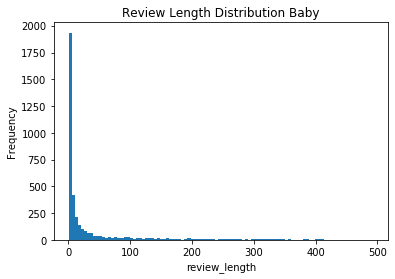

In [75]:
review_length = baby_products['reviewText'].apply(len)
review_length.value_counts().sort_index().plot(kind='hist', bins= 100, title='Review Length Distribution Baby').set_xlabel('review_length')

Text(0.5, 0, 'review_length')

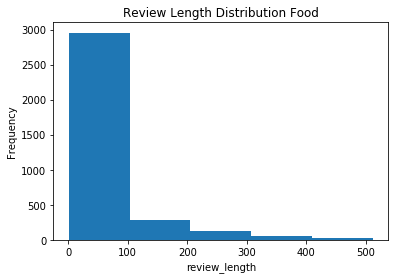

In [76]:
review_length = grocery_foods['reviewText'].apply(len)
review_length.value_counts().sort_index().plot(kind='hist', bins= 5, title='Review Length Distribution Food').set_xlabel('review_length')

Text(0.5, 0, 'review_length')

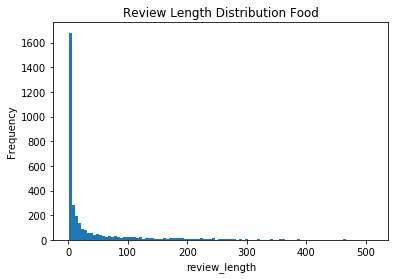

In [77]:
review_length = grocery_foods['reviewText'].apply(len)
review_length.value_counts().sort_index().plot(kind='hist', bins= 100, title='Review Length Distribution Food').set_xlabel('review_length')

Text(0.5, 0, 'review_length')

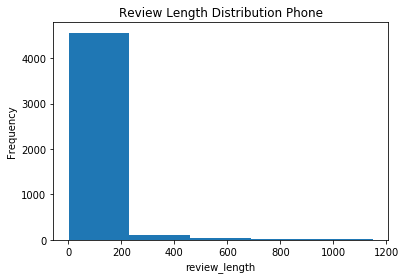

In [78]:
review_length = cell_phones['reviewText'].apply(len)
review_length.value_counts().sort_index().plot(kind='hist', bins= 5, title='Review Length Distribution Phone').set_xlabel('review_length')

Text(0.5, 0, 'review_length')

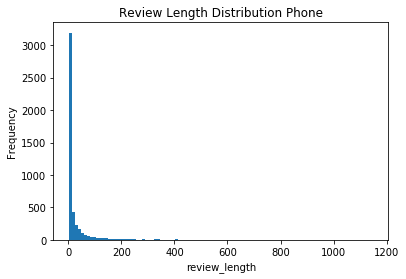

In [79]:
review_length = cell_phones['reviewText'].apply(len)
review_length.value_counts().sort_index().plot(kind='hist', bins= 100, title='Review Length Distribution Phone').set_xlabel('review_length')

Most of the baby product and grocery food reviews are of length 100 but cell phone reviews are little longer.

#### Distribution of review length and percentage of UPPERCASE per review across the different levels of star ratings

In [90]:
# baby_products distribution

rev_rating = baby_products[['rating', 'reviewText']]

rev_rating_copy = rev_rating.copy()
rev_rating_copy['rev_length'] = rev_rating_copy['reviewText'].apply(len) # review length

def caps(text):
    return np.mean([1 if i.isupper() else 0 for i in text])

rev_rating_copy['capitals']= rev_rating_copy['reviewText'].apply(caps) # % caps

rating_len_cap_baby = rev_rating_copy[['rating', 'rev_length', 'capitals']]
rating_len_cap_baby.head(2)

,rating,rev_length,capitals
0,5,253,0.011858
1,5,556,0.008993


In [91]:
# Grocery_foods_Distribution

rev_rating = grocery_foods[['rating', 'reviewText']]

rev_rating_copy = rev_rating.copy()
rev_rating_copy['rev_length'] = rev_rating_copy['reviewText'].apply(len) # review length

def caps(text):
    return np.mean([1 if i.isupper() else 0 for i in text])

rev_rating_copy['capitals']= rev_rating_copy['reviewText'].apply(caps) # % caps

rating_len_cap_food = rev_rating_copy[['rating', 'rev_length', 'capitals']]
rating_len_cap_food.head(2)

,rating,rev_length,capitals
0,4,162,0.030864
1,3,583,0.015437


In [92]:
rev_rating = cell_phones[['rating', 'reviewText']]

rev_rating_copy = rev_rating.copy()
rev_rating_copy['rev_length'] = rev_rating_copy['reviewText'].apply(len) # review length

def caps(text):
    return np.mean([1 if i.isupper() else 0 for i in text])

rev_rating_copy['capitals']= rev_rating_copy['reviewText'].apply(caps) # % caps

rating_len_cap_phone = rev_rating_copy[['rating', 'rev_length', 'capitals']]
rating_len_cap_phone.head(2)

,rating,rev_length,capitals
0,4,189,0.026455
1,5,160,0.025000


[Text(0.5, 1.0, 'Distribution of Baby Products')]

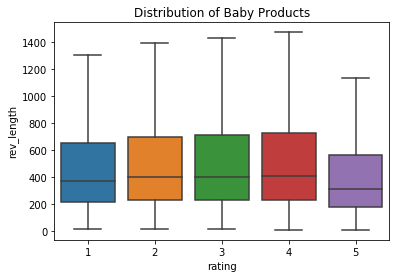

In [93]:
# rating and review length distribution for baby products
sns.boxplot(x = 'rating', y = 'rev_length', data = rating_len_cap_baby, showfliers=False).set(title='Distribution of Baby Products')

[Text(0.5, 1.0, 'Distribution of grocery_food')]

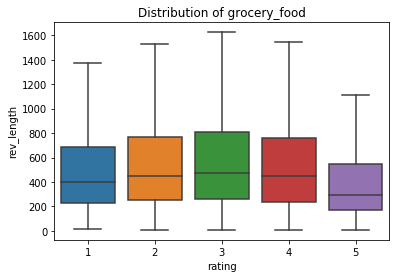

In [94]:
# rating and review length distribution for grocery_foods
sns.boxplot(x = 'rating', y = 'rev_length', data = rating_len_cap_food, showfliers=False).set(title='Distribution of grocery_food')

[Text(0.5, 1.0, 'Distribution of Cell Phones')]

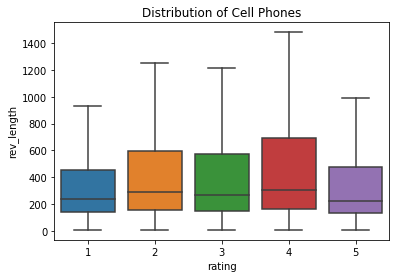

In [95]:
# rating and review length distribution for cell_phones
sns.boxplot(x = 'rating', y = 'rev_length', data = rating_len_cap_phone, showfliers=False).set(title='Distribution of Cell Phones')

In all of the three product categories, reviews corresponding to five star ratings are shorter length.

[Text(0.5, 1.0, 'Distribution of Baby Products')]

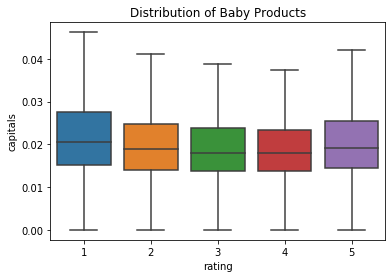

In [97]:
# Rating and % caps distribution baby_products
sns.boxplot(x = 'rating', y = 'capitals', data = rating_len_cap_baby, showfliers=False).set(title='Distribution of Baby Products')

[Text(0.5, 1.0, 'Distribution of Food')]

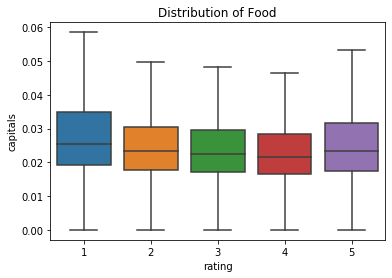

In [98]:
# Rating and % caps distribution grocery_foods
sns.boxplot(x = 'rating', y = 'capitals', data = rating_len_cap_food, showfliers=False).set(title='Distribution of Food')

[Text(0.5, 1.0, 'Distribution of Cell Phone')]

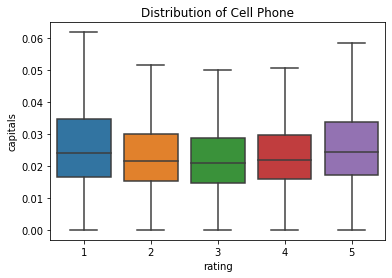

In [99]:
# Rating and % caps distribution cell_phones
sns.boxplot(x = 'rating', y = 'capitals', data = rating_len_cap_phone, showfliers=False).set(title='Distribution of Cell Phone')

In all the three product categories, reviews corresponding to 1 star and 5 star ratings has more uppercase letters

Text(0.5, 1.0, 'Distribution of % caps Baby Products')

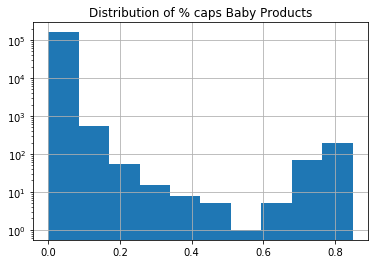

In [100]:
# Distribution of % caps baby_products
rating_len_cap_baby['capitals'].hist()
plt.yscale('log', nonposy='clip')
plt.title('Distribution of % caps Baby Products')

Text(0.5, 1.0, 'Distribution of % caps(>0.6) vs ratings Baby Products')

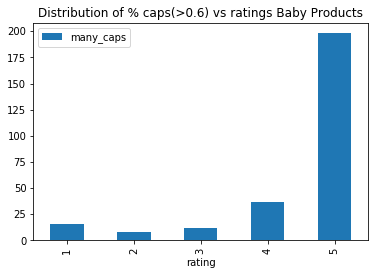

In [106]:
rating_len_cap_baby['many_caps'] = rating_len_cap_baby['capitals'].apply(lambda x: x > .6)
rating_len_cap_baby[['rating','many_caps']].groupby('rating').sum().plot(kind='bar')
plt.title('Distribution of % caps(>0.6) vs ratings Baby Products')

Text(0.5, 1.0, 'Distribution of % caps (Food)')

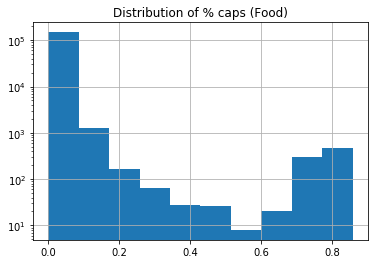

In [110]:
# Distribution of % caps grocery_foods
rating_len_cap_food['capitals'].hist()
plt.yscale('log', nonposy='clip')
plt.title('Distribution of % caps (Food)')

Text(0.5, 1.0, 'Distribution of % caps(>0.6) vs ratings (Food)')

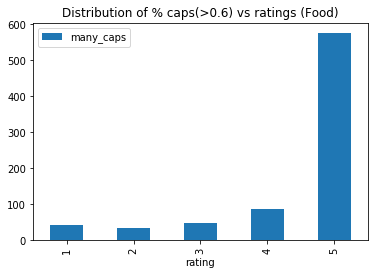

In [112]:
rating_len_cap_food['many_caps'] = rating_len_cap_food['capitals'].apply(lambda x: x > .6)
rating_len_cap_food[['rating','many_caps']].groupby('rating').sum().plot(kind='bar')
plt.title('Distribution of % caps(>0.6) vs ratings (Food)')

Text(0.5, 1.0, 'Distribution of % caps (Phone)')

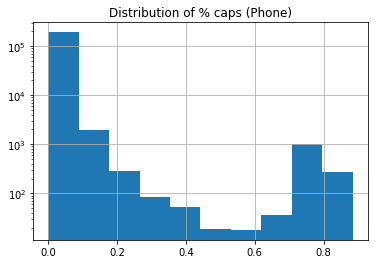

In [111]:
# Distribution of % caps cell_phones
rating_len_cap_phone['capitals'].hist()
plt.yscale('log', nonposy='clip')
plt.title('Distribution of % caps (Phone)')

Text(0.5, 1.0, 'Distribution of % caps(>0.6) vs ratings (Phone)')

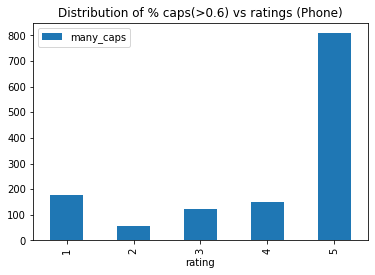

In [113]:
rating_len_cap_phone['many_caps'] = rating_len_cap_phone['capitals'].apply(lambda x: x > .6)
rating_len_cap_phone[['rating','many_caps']].groupby('rating').sum().plot(kind='bar')
plt.title('Distribution of % caps(>0.6) vs ratings (Phone)')

For all the three product categories the % caps shows bimodal distribution. The reviews containing greater than 60% uppercase letters are mostly rated 5 stars. 

### Text Pre-Processing


- Remove punctuations
- Remove Stopwords
- Tokenization: converting a sentence into a list of words
- Lower case
- Stemming/ Lemmatization: Reduce a word to it's root or base units

In [23]:
# Remove punctuations

baby_products['clean_review_baby'] = baby_products['clean_review_baby'].str.replace('[^\w\s]','')
baby_products.head(5)

,reviewText,rating,review_summary,clean_review_baby
0,Perfect for new parents. We were able to keep ...,5,Awesine,perfect for new we were able to keep track of...
1,This book is such a life saver. It has been s...,5,Should be required for all new parents!,this book is such a life saver it been so hel...
2,Helps me know exactly how my babies day has go...,5,Grandmother watching baby,me know exactly how my day gone with my mother...
3,I bought this a few times for my older son and...,5,repeat buyer,i bought this a few times for my older son and...
4,I wanted an alternative to printing out daily ...,4,Great,i an alternative to printing out daily log for...


In [24]:
# Remove Stop Words
import nltk
stop_words = nltk.corpus.stopwords.words('english')
nltk.download('stopwords')

baby_products['clean_review_baby'] = baby_products['clean_review_baby'].apply(lambda x: " ".join(w for w in x.split() if w not in stop_words))
baby_products.head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reviewText,rating,review_summary,clean_review_baby
0,Perfect for new parents. We were able to keep ...,5,Awesine,perfect new able keep track baby feeding sleep...
1,This book is such a life saver. It has been s...,5,Should be required for all new parents!,book life saver helpful able go back track ans...
2,Helps me know exactly how my babies day has go...,5,Grandmother watching baby,know exactly day gone mother law watching go w...
3,I bought this a few times for my older son and...,5,repeat buyer,bought times older son bought super easy use k...
4,I wanted an alternative to printing out daily ...,4,Great,alternative printing daily log nanny fill work...


In [25]:
len(baby_products)

160662

#### Tokenization

In [26]:
# import libraries
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


# tokenize 

def tokenization(text):
    return word_tokenize(text)

baby_products['clean_review_baby'] = baby_products['clean_review_baby'].apply(lambda x: tokenization(x.lower()))
baby_products.head(5)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,reviewText,rating,review_summary,clean_review_baby
0,Perfect for new parents. We were able to keep ...,5,Awesine,"[perfect, new, able, keep, track, baby, feedin..."
1,This book is such a life saver. It has been s...,5,Should be required for all new parents!,"[book, life, saver, helpful, able, go, back, t..."
2,Helps me know exactly how my babies day has go...,5,Grandmother watching baby,"[know, exactly, day, gone, mother, law, watchi..."
3,I bought this a few times for my older son and...,5,repeat buyer,"[bought, times, older, son, bought, super, eas..."
4,I wanted an alternative to printing out daily ...,4,Great,"[alternative, printing, daily, log, nanny, fil..."


In [27]:
# clean_review to list of strings
baby_products['clean_review_baby_str'] = baby_products['clean_review_baby'].apply(str)
baby_products.head(5)

,reviewText,rating,review_summary,clean_review_baby,clean_review_baby_str
0,Perfect for new parents. We were able to keep ...,5,Awesine,"[perfect, new, able, keep, track, baby, feedin...","['perfect', 'new', 'able', 'keep', 'track', 'b..."
1,This book is such a life saver. It has been s...,5,Should be required for all new parents!,"[book, life, saver, helpful, able, go, back, t...","['book', 'life', 'saver', 'helpful', 'able', '..."
2,Helps me know exactly how my babies day has go...,5,Grandmother watching baby,"[know, exactly, day, gone, mother, law, watchi...","['know', 'exactly', 'day', 'gone', 'mother', '..."
3,I bought this a few times for my older son and...,5,repeat buyer,"[bought, times, older, son, bought, super, eas...","['bought', 'times', 'older', 'son', 'bought', ..."
4,I wanted an alternative to printing out daily ...,4,Great,"[alternative, printing, daily, log, nanny, fil...","['alternative', 'printing', 'daily', 'log', 'n..."


### Word Clouds for high ratings vs low ratings

In [30]:
high_rating = baby_products[baby_products.rating >=4]
high_rating = high_rating.drop(columns= ['reviewText', 'review_summary', 'clean_review_baby'])
high_rating.head(2)

,rating,clean_review_baby_str
0,5,"['perfect', 'new', 'able', 'keep', 'track', 'b..."
1,5,"['book', 'life', 'saver', 'helpful', 'able', '..."


In [31]:
low_rating = baby_products[baby_products.rating < 3]
low_rating = low_rating.drop(columns= ['reviewText', 'review_summary', 'clean_review_baby'])
low_rating.head(2)

,rating,clean_review_baby_str
74,1,"['ridiculous', 'huge', 'hard', 'clamp', 'daugh..."
92,1,"['product', 'little', 'boy', 'chew', 'teething..."


In [32]:
high = " ".join(review for review in high_rating.clean_review_baby_str)
low = " ".join(review for review in low_rating.clean_review_baby_str)

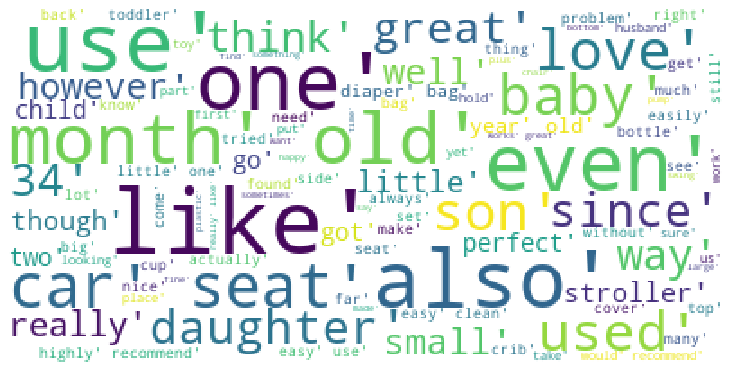

In [33]:
# import library

from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator 
import matplotlib.pyplot as plt

# Generate WordCloud images for high ratings

wordcloud_high = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(high)

# Display the image

plt.figure( figsize=(10,8))
plt.imshow(wordcloud_high)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

(-0.5, 399.5, 199.5, -0.5)

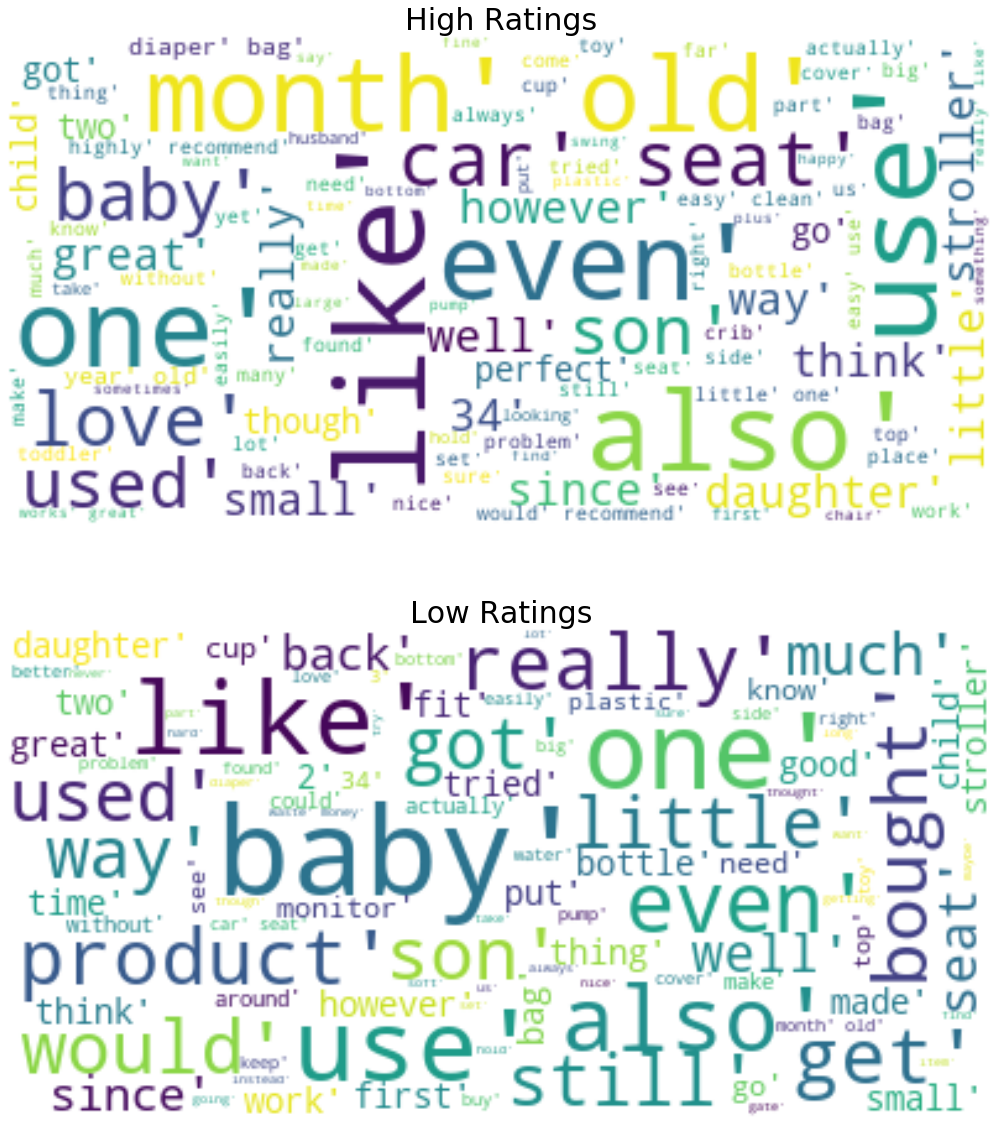

In [35]:
# import library

from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator 
import matplotlib.pyplot as plt


high = " ".join(review for review in high_rating.clean_review_baby_str)
low = " ".join(review for review in low_rating.clean_review_baby_str)


fig, axs = plt.subplots(2, 1, figsize  = (20,20))


# Generate WordCloud images

wordcloud_high = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(high)
wordcloud_low = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(low)

# Display the image

axs[0].imshow(wordcloud_high, interpolation='bilinear')
axs[0].set_title('High Ratings', fontsize=30)
axs[0].axis('off')

axs[1].imshow(wordcloud_low, interpolation='bilinear')
axs[1].set_title('Low Ratings', fontsize=30)
axs[1].axis('off')